<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Banco_de_Dados/blob/main/Lab_1Bimestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_RGB_Green-768x231.png" width=250, align="left">

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Bancos de Dados Não Relacionais**

## Laboratório avaliativo 1o Bimestre

1. Atividade em grupo, min 2 alunos max 5 alunos.
2. Esta é uma atividade em que faz parte do exercício o entendimento do problema e a pesquisa das soluções. Desse modo, não espere encontrar nas aulas, todas as soluções que irá empregar, embora a maior parte você tenha tido no conteúdo das aulas.


![imagem](https://github.com/Rogerio-mack/IMT_Banco_de_Dados/blob/main/Figuras/Lab1.png?raw=true)

## Enunciado

Este laboratório consiste em extrair dados do Spotify a partir de sua API de para criar duas coleções Spotify_Artists e Spotify_TopTracks de **3 artistas de preferência do grupo**. Você pode empregar os códigos abaixo para fazer essas extrações depois de acessar o seu perfil no Spotify e obter sua API_key. A partir dessas coleções vocês vai criar sua própria base de documentos no MongoDB com as 3 coleções cujos os campos são exemplificados a seguir.


### **Database**
```
use Maua_Music;
```

### **1. Collection Maua_Artists**
```
//   A chave pode empregar dos dados ou criar novas, automáticas ou não
{
  "_id": "66cbae3f2aad5e2a8567c5d4" // Chave
  "name": "Avril Lavigne",          // Nome do artista
  "popularity": 78,                 // Popularidade
  // Url com a 1a foto do artista na coleção original
  "photo": "https://i.scdn.co/image/ab6761610000e5eb5c3349ddba6b8e064c1bab16",
  "genre": "canadian pop"           // Primeiro genêro na lista de genêros
}
```

### **2. Collection Maua_Albuns**
```
//   A chave pode empregar dos dados ou criar novas, automáticas ou não
{
  "_id": "88cbae3f2aad5e2a856715ee" // Chave
  "name": "Let Go",                 // Nome do álbum
  "release_date": "2002-06-04",     // Data de lançamento
  "total_tracks": 13,               // Total de trilhas
  // Capa do álbum (primeira imagem)
  "cover": "https://i.scdn.co/image/ab67616d0000b273f7ec724fbf97a30869d06240"
}
```

### **3. Collection Maua_Trilhas**
```
//   A chave pode empregar dos dados ou criar novas, automáticas ou não
{
  "_id": "72310238cbae3f2aaa85adbb" // Chave
  "name": "Complicated",            // Nome da trilha
  "explicit": false,        // Se a trilha contém conteúdo explícito ou não
  "popularity": 83,                 // Popularidade da trilha
  "duration_ms": 244506             // Duração da trilha em milissegundos
}

```
Construídas as relações acimas você fará os seguintes relacionamentos/joins. Para criar os relacionamentos você poderá criar campos novos e/ou empregar campos já existentes nas coleções. Mas procure criar campos de relacionamento que façam sentido, e o desenho da solução empregada é parte do que será avaliado.

### **4. Maua_Artists $\times$ Maua_Albuns**
Apresentando os campos nome do artista, genero, nome do album e data de lançamento, somente do album mais recente de cada artista.

### **5. Maua_Artists $\times$ Maua_Albuns $\times$ Maua_Trilhas**
Apresentando os campos nome do artista, genero, nome do album, nome da trilha e sua popularidade, somente para trilhas com uma popularidade acima da média de pouparilidade de todos os dados da base.







## Entrega

Entregue 2 scripts, em formato .js (entregas .zip ou outros formatos serão ignoradas).

1. **Script 1: get_spotify.js**. Com a criação das coleções Spotify_Artists e Spotify_TopTracks a partir dos dados originais do Spotify.
2. **Script 2: maua_music.js**. A criação das coleções de Maua_Music e os joins.

## Scripts exemplos de extração de dados do Spotify API

In [ ]:
import requests
import base64

# Suas credenciais do Spotify
client_id = "771e47fec809492e9f8f64a3a3eeb4d2"
client_secret = "d29350e650dc48a094ddea7b72199372"

# Passo 1: Obter o token de acesso
auth_url = 'https://accounts.spotify.com/api/token'
auth_headers = {
    'Authorization': 'Basic ' + base64.b64encode(f'{client_id}:{client_secret}'.encode()).decode()
}
auth_data = {
    'grant_type': 'client_credentials'
}

auth_response = requests.post(auth_url, headers=auth_headers, data=auth_data)
auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

# Passo 2: Buscar o artista pelo nome
artist_name = input('Entre com o nome do artista: ')

search_url = f'https://api.spotify.com/v1/search?q={artist_name}&type=artist&limit=1'
search_headers = {
    'Authorization': f'Bearer {access_token}'
}

search_response = requests.get(search_url, headers=search_headers)
search_results = search_response.json()

# Passo 3: Recuperar o Spotify ID do artista
if search_results['artists']['items']:
    artist = search_results['artists']['items'][0]
    artist_name = artist['name']
    artist_id = artist['id']
    print(f"O Spotify ID do artista {artist_name} é: {artist_id}")
else:
    print("Artista não encontrado.")


Entre com o nome do artista: Avril Lavigne
O Spotify ID do artista Avril Lavigne é: 0p4nmQO2msCgU4IF37Wi3j


### Para compor Spotify_Artists

In [ ]:
search_url = f'https://api.spotify.com/v1/artists/{artist_id}'
search_headers = {
    'Authorization': f'Bearer {access_token}'
}

search_response = requests.get(search_url, headers=search_headers)
search_results = search_response.json()
search_results

{'external_urls': {'spotify': 'https://open.spotify.com/artist/0p4nmQO2msCgU4IF37Wi3j'},
 'followers': {'href': None, 'total': 11222138},
 'genres': ['canadian pop', 'candy pop', 'dance pop', 'pop'],
 'href': 'https://api.spotify.com/v1/artists/0p4nmQO2msCgU4IF37Wi3j',
 'id': '0p4nmQO2msCgU4IF37Wi3j',
 'images': [{'url': 'https://i.scdn.co/image/ab6761610000e5eb5c3349ddba6b8e064c1bab16',
   'height': 640,
   'width': 640},
  {'url': 'https://i.scdn.co/image/ab676161000051745c3349ddba6b8e064c1bab16',
   'height': 320,
   'width': 320},
  {'url': 'https://i.scdn.co/image/ab6761610000f1785c3349ddba6b8e064c1bab16',
   'height': 160,
   'width': 160}],
 'name': 'Avril Lavigne',
 'popularity': 78,
 'type': 'artist',
 'uri': 'spotify:artist:0p4nmQO2msCgU4IF37Wi3j'}

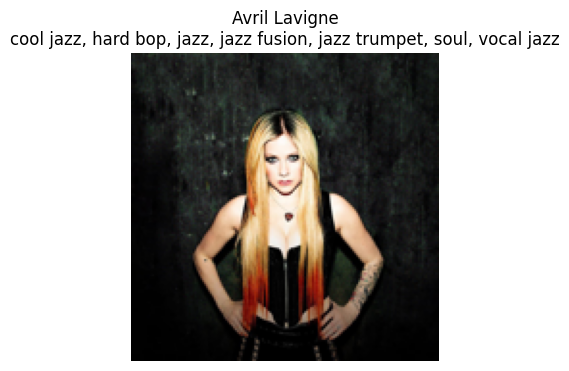

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

plt.figure(figsize=(4,4))
response = requests.get(dict(search_results)['images'][0]['url'])
img = Image.open(BytesIO(response.content))
width, height = img.size
img = img.resize((width//4, height//4))

plt.imshow(img)
plt.axis('off')
plt.title(dict(search_results)['name'] + '\n' + genres_text)
plt.show()

### Para compor Spotify_Tracks

In [ ]:
search_url = f'https://api.spotify.com/v1/artists/{artist_id}/top-tracks'
search_headers = {
    'Authorization': f'Bearer {access_token}'
}

search_response = requests.get(search_url, headers=search_headers)
search_results = search_response.json()
search_results

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0p4nmQO2msCgU4IF37Wi3j'},
      'href': 'https://api.spotify.com/v1/artists/0p4nmQO2msCgU4IF37Wi3j',
      'id': '0p4nmQO2msCgU4IF37Wi3j',
      'name': 'Avril Lavigne',
      'type': 'artist',
      'uri': 'spotify:artist:0p4nmQO2msCgU4IF37Wi3j'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/3zXjR3y2dUWklKmmp6lEhy'},
    'href': 'https://api.spotify.com/v1/albums/3zXjR3y2dUWklKmmp6lEhy',
    'id': '3zXjR3y2dUWklKmmp6lEhy',
    'images': [{'url': 'https://i.scdn.co/image/ab67616d0000b273f7ec724fbf97a30869d06240',
      'width': 640,
      'height': 640},
     {'url': 'https://i.scdn.co/image/ab67616d00001e02f7ec724fbf97a30869d06240',
      'width': 300,
      'height': 300},
     {'url': 'https://i.scdn.co/image/ab67616d00004851f7ec724fbf97a30869d06240',
      'width': 64,
      'height': 64}],
    'is_playable': True,
    'name': 'Let Go',
 

In [ ]:
df = pd.json_normalize(dict(search_results),['tracks'])
df[['name','album.name','album.id']]

,name,album.name,album.id
0,Complicated,Let Go,3zXjR3y2dUWklKmmp6lEhy
1,I'm with You,Let Go,3zXjR3y2dUWklKmmp6lEhy
2,Sk8er Boi,Let Go,3zXjR3y2dUWklKmmp6lEhy
3,What the Hell,Goodbye Lullaby (Expanded Edition),1COPJyU2PpM2Itcob3vhFF
4,Girlfriend,The Best Damn Thing (Expanded Edition),6lqE05fiHWJVYYdMVJNj38
5,My Happy Ending,Under My Skin,7851Vsjv3apS52sXUik6iF
6,When You're Gone,The Best Damn Thing (Expanded Edition),6lqE05fiHWJVYYdMVJNj38
7,Here's to Never Growing Up,Avril Lavigne (Expanded Edition),7qjA5gbagHWVbqKUgVt49l
8,Wish You Were Here,Goodbye Lullaby (Expanded Edition),1COPJyU2PpM2Itcob3vhFF
9,Nobody's Home,Under My Skin,7851Vsjv3apS52sXUik6iF


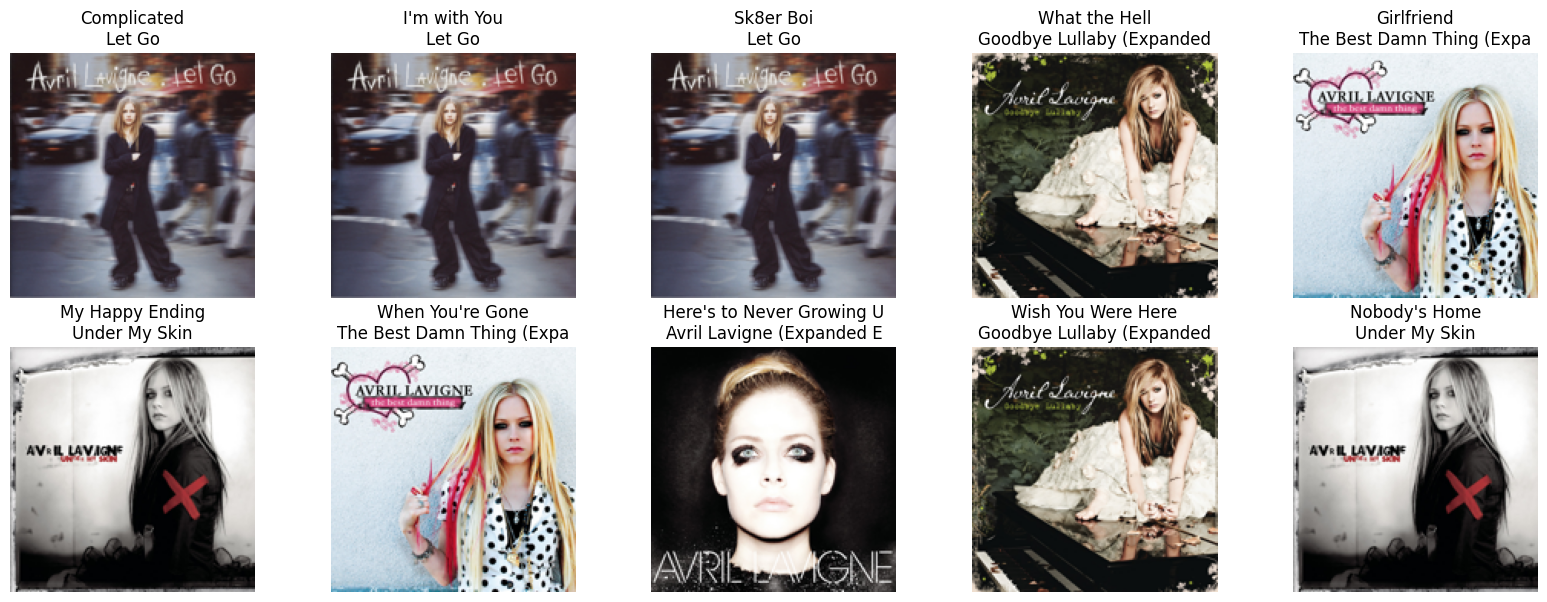

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,7))
axis = ax.flatten()
i = 0

for _, row in df.iterrows():

  response = requests.get(row['album.images'][0]['url'])
  img = Image.open(BytesIO(response.content))
  width, height = img.size
  img = img.resize((width//4, height//4))

  axis[i].imshow(img)
  axis[i].axis('off')
  L_name = min(25,len(row['name']))
  L_album = min(25,len(row['album.name']))
  axis[i].set_title(row['name'][0:L_name] + '\n' + row['album.name'][0:L_album])

  i=i+1

plt.show()